# Dự đoán xu hướng điểm trung vị của khối A, B, C, D,...

### B1: chuẩn bị dữ liệu và các thông số để dự đoán

In [1]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ các file
file_paths = {
    "2020": r'..\Data\diem_thi_2020.csv',
    "2021": r'..\Data\diem_thi_2021.csv',
    "2022": r'..\Data\diem_thi_2022.csv',
    "2023": r'..\Data\diem_thi_2023.csv',
    "2024": r'..\Data\diem_thi_2024.csv'
}

# Lưu kết quả trung bình theo năm
average_scores = []

for year, path in file_paths.items():
    # Đọc dữ liệu từng năm
    df = pd.read_csv(path)
    
    # Kiểm tra các cột cần thiết
    required_columns = ['Toán', 'Lý', 'Hóa', 'Văn', 'Sử', 'Địa', 'Ngoại Ngữ', 'Sinh']
    

    # Tính điểm các khối
    df['Khối A'] = df['Toán'] + df['Lý'] + df['Hoá']
    df['Khối B'] = df['Toán'] + df['Hoá'] + df['Sinh']
    df['Khối C'] = df['Văn'] + df['Sử'] + df['Địa']
    df['Khối D'] = df['Toán'] + df['Văn'] + df['Ngoại Ngữ']

    # Tính trung bình điểm từng khối
    averages = {
        'Năm': year,
        'Trung bình Khối A': df['Khối A'].mean(),
        'Trung bình Khối B': df['Khối B'].mean(),
        'Trung bình Khối C': df['Khối C'].mean(),
        'Trung bình Khối D': df['Khối D'].mean()
    }
    average_scores.append(averages)

# Chuyển kết quả sang DataFrame và in ra
result_df = pd.DataFrame(average_scores)



### B2: huấn luyện mô hình và dự báo

In [2]:
from sklearn.linear_model import LinearRegression
years = np.array([2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
scores_A = result_df['Trung bình Khối A']
scores_B = result_df['Trung bình Khối B']
scores_C = result_df['Trung bình Khối C']
scores_D = result_df['Trung bình Khối D']

# Dự báo cho từng khối
model_A = LinearRegression().fit(years, scores_A)
model_B = LinearRegression().fit(years, scores_B)
model_C = LinearRegression().fit(years, scores_C)
model_D = LinearRegression().fit(years, scores_D)

# Dự báo năm 2025
year_2025 = np.array([[2025]])
predicted_A = model_A.predict(year_2025)[0]
predicted_B = model_B.predict(year_2025)[0]
predicted_C = model_C.predict(year_2025)[0]
predicted_D = model_D.predict(year_2025)[0]

### B3: vẽ biểu đồ thể hiện dự báo

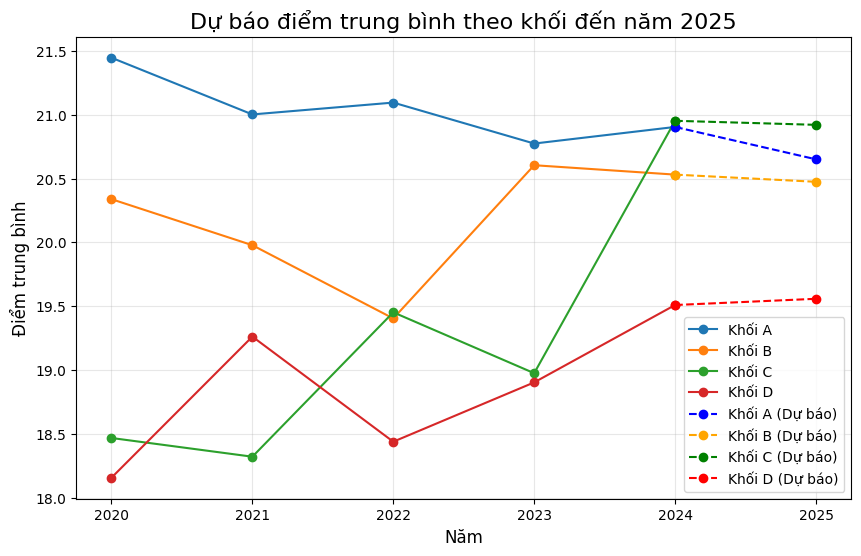

In [3]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu hiện tại và dự báo
years_full = np.append(years.flatten(), 2025)
scores_A_full = np.append(scores_A, predicted_A)
scores_B_full = np.append(scores_B, predicted_B)
scores_C_full = np.append(scores_C, predicted_C)
scores_D_full = np.append(scores_D, predicted_D)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ đường cho từng khối
plt.plot(years, scores_A, label="Khối A", marker='o', linestyle='-')
plt.plot(years, scores_B, label="Khối B", marker='o', linestyle='-')
plt.plot(years, scores_C, label="Khối C", marker='o', linestyle='-')
plt.plot(years, scores_D, label="Khối D", marker='o', linestyle='-')

# Nét đứt cho dự báo
plt.plot([2024, 2025], [scores_A.iloc[-1], predicted_A], label="Khối A (Dự báo)", marker='o', linestyle='--', color='blue')
plt.plot([2024, 2025], [scores_B.iloc[-1], predicted_B], label="Khối B (Dự báo)", marker='o', linestyle='--', color='orange')
plt.plot([2024, 2025], [scores_C.iloc[-1], predicted_C], label="Khối C (Dự báo)", marker='o', linestyle='--', color='green')
plt.plot([2024, 2025], [scores_D.iloc[-1], predicted_D], label="Khối D (Dự báo)", marker='o', linestyle='--', color='red')


# Tùy chỉnh biểu đồ
plt.title("Dự báo điểm trung bình theo khối đến năm 2025", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xticks(years_full)  # Hiển thị tất cả các năm
plt.legend()
plt.grid(alpha=0.3)

# Hiển thị biểu đồ
plt.show()


# Dự đoán số thí sinh có điểm >= 27đ 

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ các file
file_paths = {
    "2020": r'..\Data\diem_thi_2020.csv',
    "2021": r'..\Data\diem_thi_2021.csv',
    "2022": r'..\Data\diem_thi_2022.csv',
    "2023": r'..\Data\diem_thi_2023.csv',
    "2024": r'..\Data\diem_thi_2024.csv'
}

# Lưu kết quả trung bình và số thí sinh trên 27 điểm
average_scores = []
students_above_27 = []

for year, path in file_paths.items():
    # Đọc dữ liệu từng năm
    df = pd.read_csv(path)
    
    # Kiểm tra các cột cần thiết
    required_columns = ['Toán', 'Lý', 'Hoá', 'Văn', 'Sử', 'Địa', 'Ngoại Ngữ', 'Sinh']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Dữ liệu {year} thiếu cột cần thiết.")

    # Tính điểm các khối
    df['Khối A'] = df['Toán'] + df['Lý'] + df['Hoá']
    df['Khối B'] = df['Toán'] + df['Hoá'] + df['Sinh']
    df['Khối C'] = df['Văn'] + df['Sử'] + df['Địa']
    df['Khối D'] = df['Toán'] + df['Văn'] + df['Ngoại Ngữ']

    # Tính trung bình từng khối
    avg_a = df['Khối A'].mean()
    avg_b = df['Khối B'].mean()
    avg_c = df['Khối C'].mean()
    avg_d = df['Khối D'].mean()
    average_scores.append((int(year), avg_a, avg_b, avg_c, avg_d))

    # Đếm số lượng thí sinh có điểm > 27
    count_a = (df['Khối A'] > 27).sum()
    count_b = (df['Khối B'] > 27).sum()
    count_c = (df['Khối C'] > 27).sum()
    count_d = (df['Khối D'] > 27).sum()
    students_above_27.append((int(year), count_a, count_b, count_c, count_d))

# Chuyển kết quả thành DataFrame
average_scores_df = pd.DataFrame(average_scores, columns=['Year', 'Khối A', 'Khối B', 'Khối C', 'Khối D'])
students_above_27_df = pd.DataFrame(students_above_27, columns=['Year', 'Khối A', 'Khối B', 'Khối C', 'Khối D'])

# Dự đoán số thí sinh trên 27 điểm cho năm 2025
years = np.array(average_scores_df['Year']).reshape(-1, 1)

# Dự báo cho từng khối
predictions = {}
for col in ['Khối A', 'Khối B', 'Khối C', 'Khối D']:
    model = LinearRegression().fit(years, students_above_27_df[col])
    predictions[col] = model.predict(np.array([[2025]]))[0]

# Kết quả dự báo
print("Dự báo số thí sinh có điểm trên 27 năm 2025:")
for khối, dự_báo in predictions.items():
    print(f"{khối}: {int(dự_báo)} thí sinh")


Dự báo số thí sinh có điểm trên 27 năm 2025:
Khối A: 2775 thí sinh
Khối B: 914 thí sinh
Khối C: 16155 thí sinh
Khối D: 2716 thí sinh


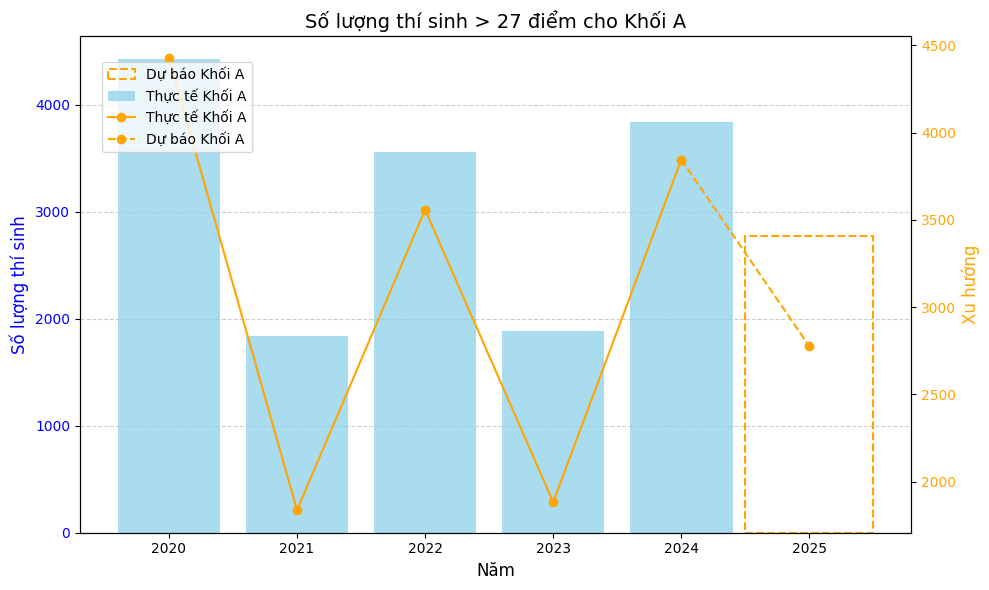

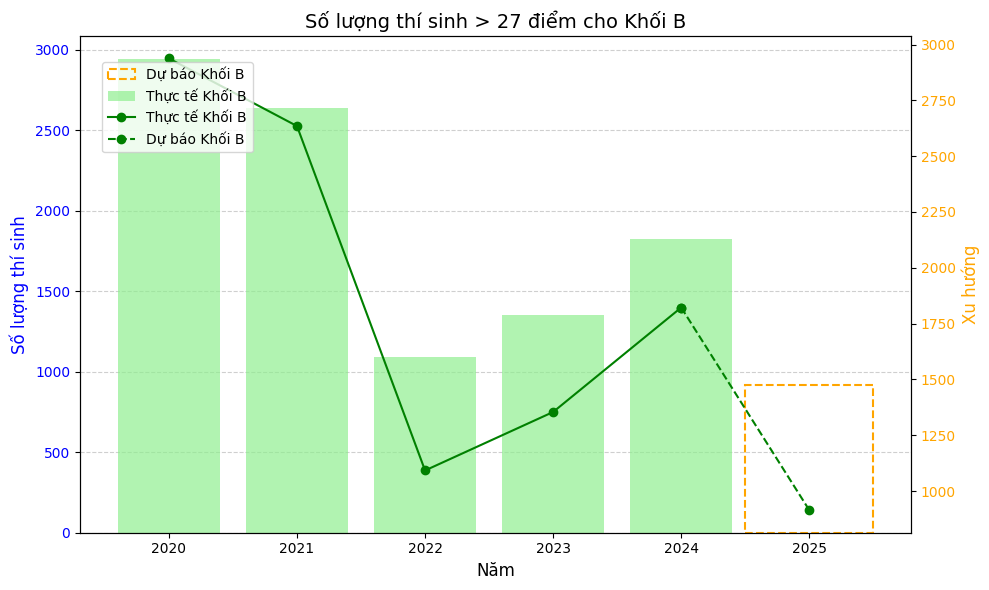

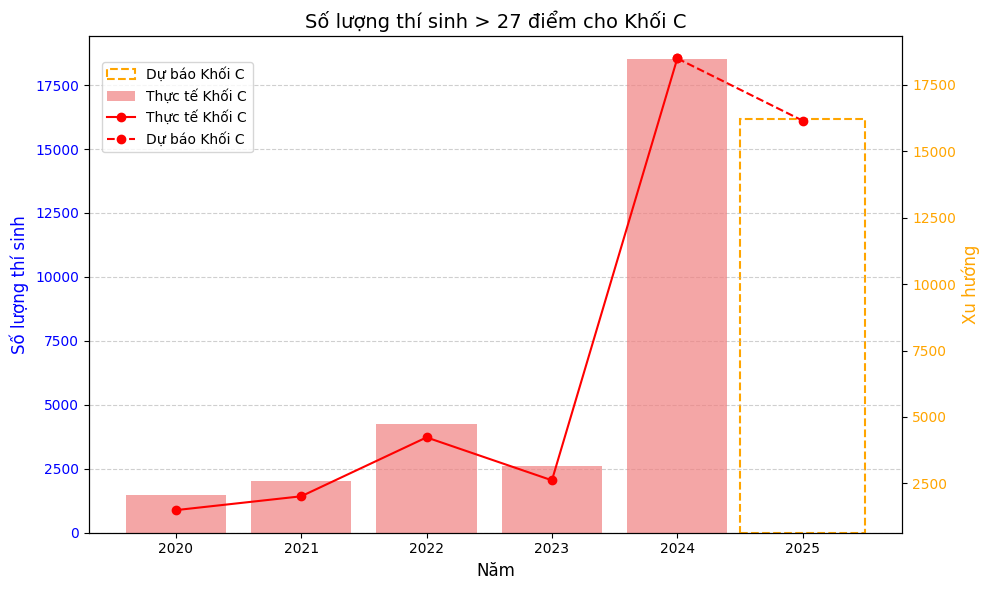

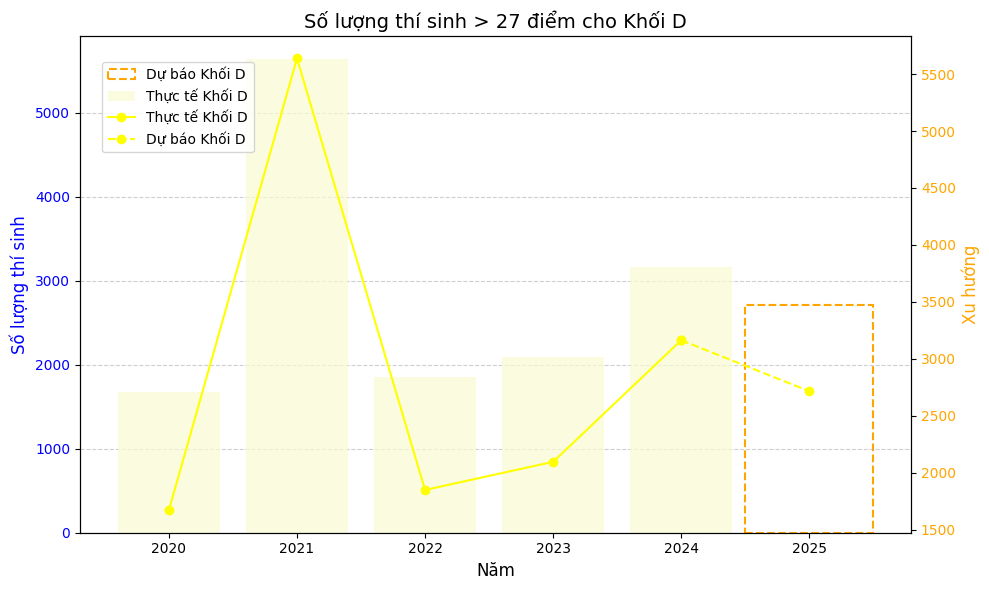

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

years_actual = students_above_27_df['Year']
predictions_2025 = {
    'Khối A': predictions['Khối A'],
    'Khối B': predictions['Khối B'],
    'Khối C': predictions['Khối C'],
    'Khối D': predictions['Khối D']
}
values_actual = {
    'Khối A': students_above_27_df['Khối A'],
    'Khối B': students_above_27_df['Khối B'],
    'Khối C': students_above_27_df['Khối C'],
    'Khối D': students_above_27_df['Khối D']
}

# Tạo 4 biểu đồ riêng biệt cho các khối A, B, C, D
for i, combo in enumerate(['Khối A', 'Khối B', 'Khối C', 'Khối D']):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Dữ liệu kết hợp
    values_actual_combo = values_actual[combo]
    predicted_2025_combo = predictions_2025[combo]

    years_all = list(years_actual) + [2025]
    values_all_combo = list(values_actual_combo) + [predicted_2025_combo]

    # Biểu đồ cột (thực tế)
    ax1.bar(years_actual, values_actual_combo, color=['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow'][i], 
            alpha=0.7, label=f'Thực tế {combo}', zorder=2)

    # Thêm hình chữ nhật nét đứt cho phần dự báo
    rect = patches.Rectangle(
        (2024.5, 0),  # Góc dưới bên trái
        1,  # Chiều rộng
        predicted_2025_combo,  # Chiều cao
        linewidth=1.5,
        edgecolor='orange',
        facecolor='none',
        linestyle='--',
        label=f'Dự báo {combo}'
    )
    ax1.add_patch(rect)

    # Đường xu hướng
    ax2 = ax1.twinx()
    ax2.plot(years_all[:-1], values_all_combo[:-1], color=['orange', 'green', 'red', 'yellow'][i], marker='o', label=f'Thực tế {combo}', zorder=3)  # Đường thực tế
    ax2.plot(years_all[-2:], values_all_combo[-2:], color=['orange', 'green', 'red', 'yellow'][i], linestyle='--', marker='o', label=f'Dự báo {combo}', zorder=3)  # Đường dự báo
    ax2.set_ylabel('Xu hướng', fontsize=12, color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Đặt nhãn cho trục
    ax1.set_xlabel('Năm', fontsize=12)
    ax1.set_ylabel('Số lượng thí sinh', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Số lượng thí sinh > 27 điểm cho {combo}', fontsize=14)

    # Hiển thị lưới và chú thích
    ax1.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()


# Dự báo điểm xu hướng biến động điểm thi 

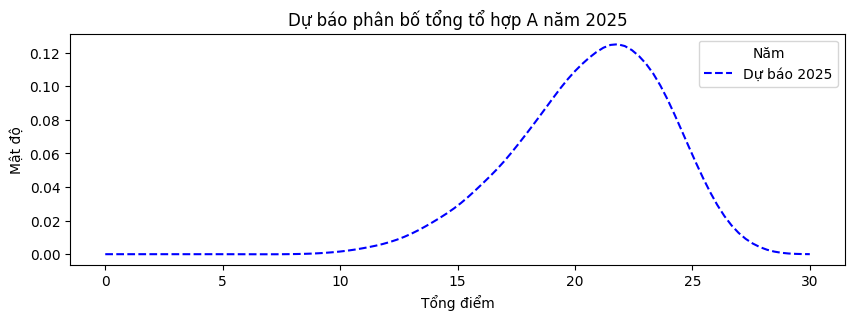

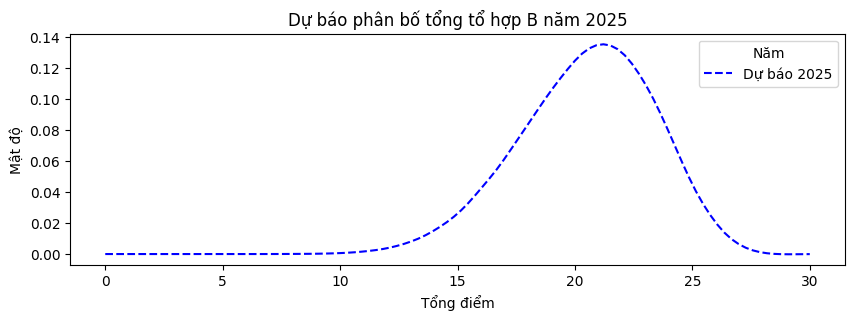

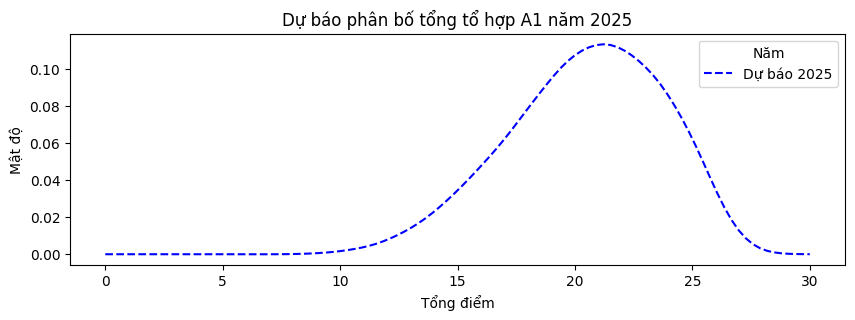

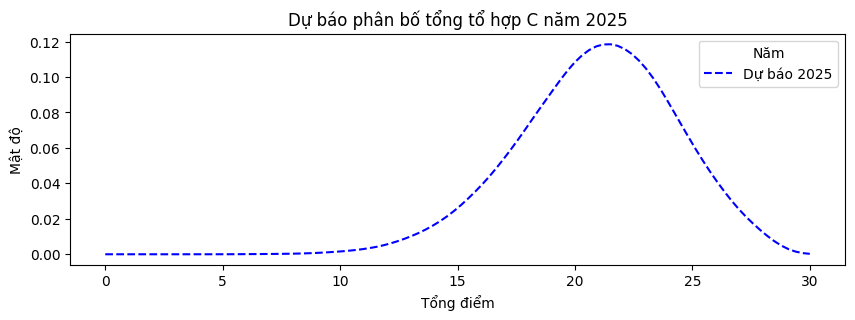

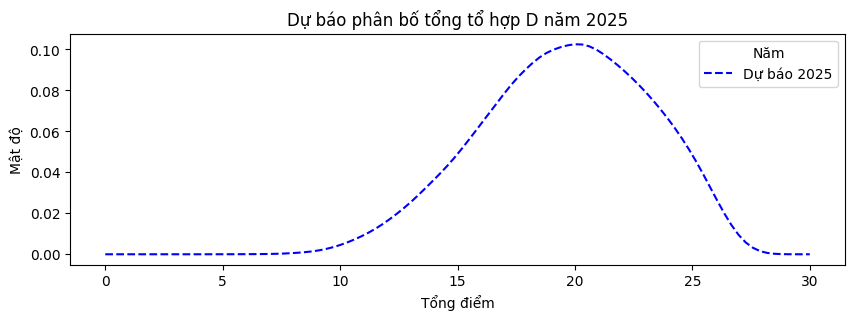

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc và gộp dữ liệu
files = {
    2020: r'..\Data\diem_thi_2020.csv',
    2021: r'..\Data\diem_thi_2021.csv',
    2022: r'..\Data\diem_thi_2022.csv',
    2023: r'..\Data\diem_thi_2023.csv',
    2024: r'..\Data\diem_thi_2024.csv'
}

dataframe = {}

# Đọc và gộp dữ liệu
for year, file in files.items():
    df = pd.read_csv(file)
    df['year'] = year  # Thêm cột năm
    dataframe[year] = df

df_filtered = pd.concat(dataframe.values(), ignore_index=True)

# Tính tổng điểm các tổ hợp
df_filtered['A'] = df_filtered['Toán'] + df_filtered['Lý'] + df_filtered['Hoá']
df_filtered['A1'] = df_filtered['Toán'] + df_filtered['Lý'] + df_filtered['Ngoại Ngữ']
df_filtered['B'] = df_filtered['Toán'] + df_filtered['Hoá'] + df_filtered['Sinh']
df_filtered['C'] = df_filtered['Văn'] + df_filtered['Sử'] + df_filtered['Địa']
df_filtered['D'] = df_filtered['Toán'] + df_filtered['Văn'] + df_filtered['Ngoại Ngữ']

combinations = ['A', 'B', 'A1', 'C', 'D']
colors = ['steelblue', 'olive', 'orange', 'tomato', 'purple']

# Chuẩn bị dữ liệu dự báo
x_range = np.linspace(0, 30, 100)  # Giảm số điểm trong x_range từ 300 xuống còn 100
years = np.array(sorted(files.keys())).reshape(-1, 1)  # Các năm hiện tại
densities = {combo: [] for combo in combinations}

# Lưu kết quả KDE tạm thời
kde_results = {}

# Ước lượng mật độ KDE cho từng tổ hợp
for combo in combinations:
    kde_results[combo] = {}
    for year in years.flatten():
        data = df_filtered[df_filtered['year'] == year]
        kde = sns.kdeplot(data[combo].dropna(), bw_adjust=2).get_lines()[0].get_data()
        plt.close()  # Đóng hình KDE tạm thời
        kde_results[combo][year] = kde  # Lưu kết quả KDE vào dict

# Nội suy mật độ cho từng tổ hợp
densities = {combo: [] for combo in combinations}
for combo in combinations:
    for year in years.flatten():
        kde = kde_results[combo][year]
        density = np.interp(x_range, kde[0], kde[1])  # Nội suy mật độ để khớp dải x_range
        densities[combo].append(density)

# Dự báo mật độ năm 2025 cho từng tổ hợp
predicted_densities = {}

for combo in combinations:
    densities_array = np.array(densities[combo])  # Mật độ cho từng năm
    predicted_density = []
    for i in range(len(x_range)):  # Dự báo từng giá trị điểm
        model = LinearRegression().fit(years, densities_array[:, i])
        predicted_density.append(model.predict([[2025]])[0])
    predicted_densities[combo] = np.array(predicted_density)

# Vẽ biểu đồ chỉ với phần dự báo
for combo in combinations:
    plt.figure(figsize=(10, 3))
    # Vẽ phân bố dự báo cho năm 2025
    plt.plot(x_range, predicted_densities[combo], linestyle='--', color='blue', label='Dự báo 2025')
    plt.title(f'Dự báo phân bố tổng tổ hợp {combo} năm 2025')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()
